# Plotting

The model output offers a simple plotting function to make it easy to quickly visualise your simulations. See {func}`FMNPOutput.plot() <fragmentmnp.output.FMNPOutput.plot()>` for full details.

To plot the time evolution of mass concentrations across size classes:

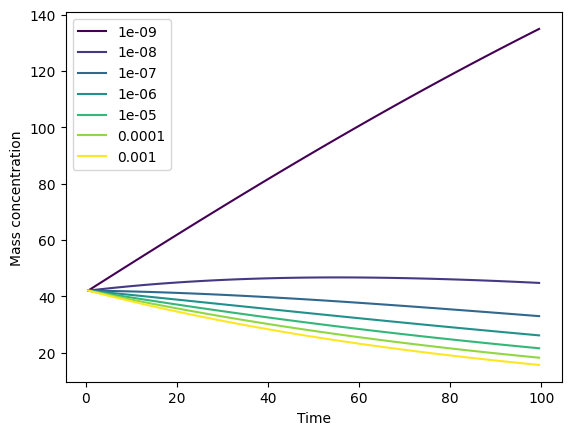

In [2]:
from fragmentmnp import FragmentMNP
from fragmentmnp.examples import minimal_config, minimal_data

# Use the example config and data to run the model
fmnp = FragmentMNP(minimal_config, minimal_data)
output = fmnp.run()
# Plot the results. `plot` returns (fig, ax), but we
# don't need that here
_ = output.plot()

## Plot types, dissolution/mineralisation and log scales

You can either plot mass concentrations (`mass_conc`) or particle number concentrations (`particle_number_conc`) by using the `type` parameter. The default is to plot mass concentrations (as per above). Dissolution and mineralisation mass concentrations can be included on a secondary y axis by specifying `plot_dissolution=True` and/or `plot_mineralisation=True`. In the following example, we specify an arbitrary dissolution rate to demonstrate this.

By default, the y-axis scale is linear. A log scale can be used instead by specifying `log_yaxis=True` or `log_yaxis='log'`, or a [symlog](https://matplotlib.org/stable/gallery/scales/symlog_demo.html) scale can be used by specifying `log_yaxis='symlog'`.

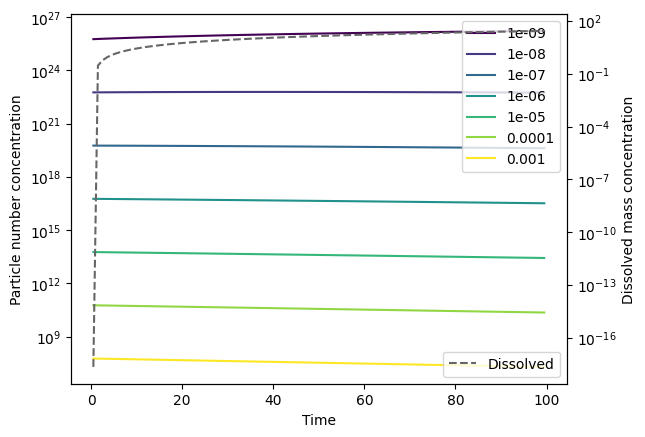

In [3]:
# Make dissolution happen and re-run the model
minimal_data['k_diss'] = 1e-3
output = FragmentMNP(minimal_config, minimal_data).run()
# Plot the particle number concentration
_ = output.plot(type='particle_number_conc',
                plot_dissolution=True, 
                log_yaxis=True)

## Units

The model itself is, by design, unit-agnostic. Because of this, if you want units on your axes and legend, they must be specified by using the `units` parameter. This can either be:
* `SI`: Use SI units (kg, m, s).
* `dim`: Use dimension names ("mass", "length", "time", "volume") instead of units.
* A dictionary that maps between dimension and units, e.g. `{'mass': 'mg', 'length': 'µm', 'time': 'days', 'volume': 'l'}`. All four elements - mass, length, time and volume - must be present.

If no `units` parameter is provided (or it is set to `None`), no units are shown on labels.

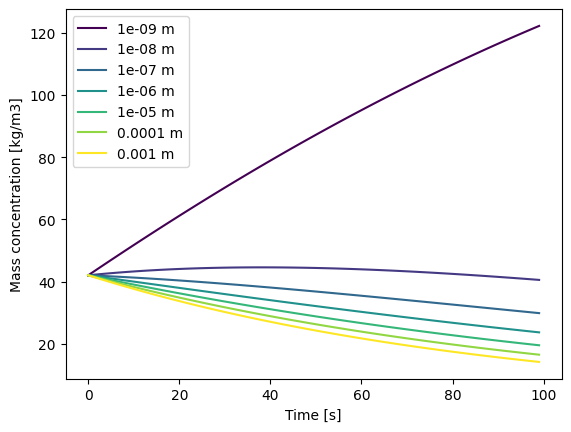

In [3]:
# Use SI units on the labels
_ = output.plot(units='si')

:::{note}
Specifying units to use on a plot does *not* alter the model output data in any way. Remember, the model is unit-agnostic. It is up to you to verify that the units that you specify are correct (i.e. match the input data you provided). If you wish to scale the output data before plotting, you can do this directly on the `FMNPOutput` object.
:::

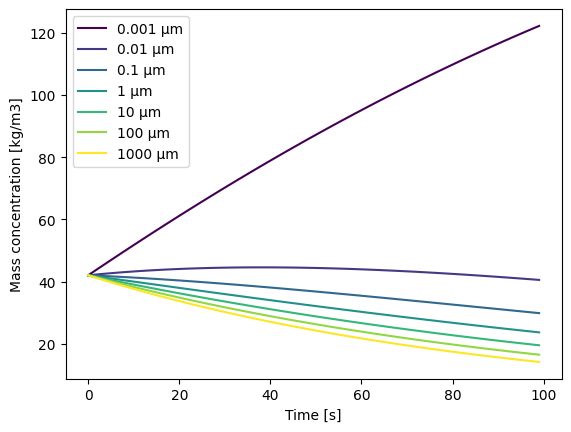

In [4]:
# Scale the particle sizes from m to µm before plotting
output.psd = output.psd * 1e6
# Keep all the other units the same, just modify the length
_ = output.plot(units={'mass': 'kg', 'length': 'µm', 'time': 's', 'volume': 'm3'})

## Legends and colourmaps

By default, the size class legend is shown. This can be toggled off with `show_legend=False`. Note that, if the dissolution axis is shown (`plot_dissolution=True`), the dissolution legend is always shown in order to distinguish it from the particle concentrations. If you wish to change this, you can [access the underlying matplotlib fig and axes to do so](plotting:fig-ax).

You can also control the colourmap that is used by specifying the `cmap` option to be one of the [options provided by matplotlib](https://matplotlib.org/stable/gallery/color/colormap_reference.html). The default is "viridis", which is a good colourblind-friendly option for sequential data (i.e. particle size classes).

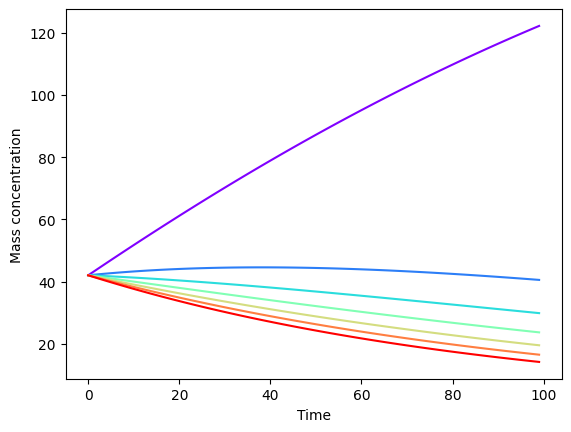

In [5]:
# Don't show the legend and use the rainbow cmap (really?!)
_ = output.plot(show_legend=False, cmap='rainbow')

## Selecting which size classes to plot

The `size_classes_to_plot` parameter lets you choose which size classes you want to plot. This might be useful if you are plotting the model output data against measurement data that is binned with a coarser size resolution, and you only wish to plot size classes for which there are measurement data. The `size_classes_to_plot` parameter takes a list of size class indices, with 0 representing the smallest size class. Setting `size_classes_to_plot` to `None` will result in all size classes being plotted, which is the default.

For example, to plot only the smallest and largest size classes:

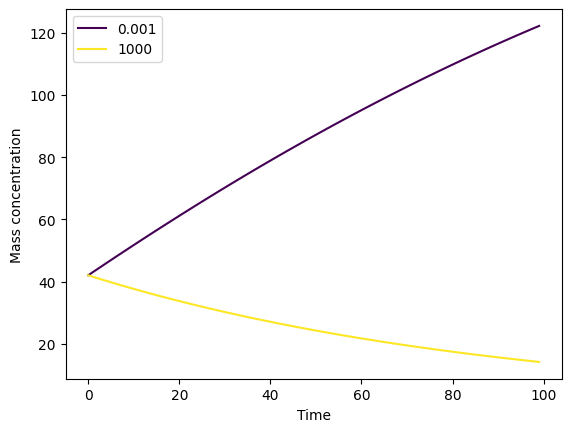

In [7]:
_ = output.plot(size_classes_to_plot=[0, output.n_size_classes - 1])

(plotting:fig-ax)=
## Advanced control through matplotlib

If the simple options provided directly by the `plot()` function don't meet your requirements, the underlying matplotlib `fig` and `ax` objects are returned from the function. For example, to change an axis label to a custom value:

Text(0.5, 0, 'Duration')

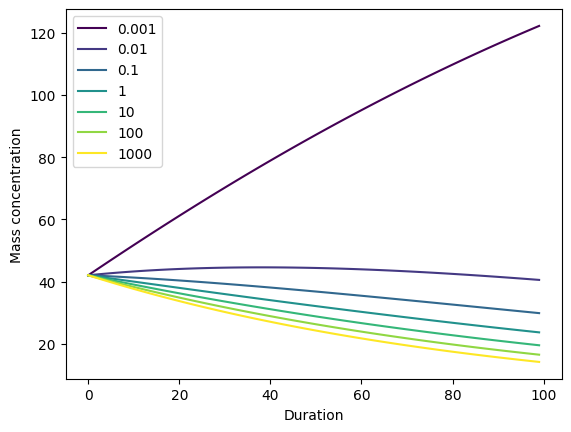

In [6]:
fig, ax = output.plot()
_ = ax.set_xlabel('Duration')

Note that, if `plot_dissolution=False` (default), then only one axis is created and returned by the function. If `plot_dissolution=True`, two axes are created and these are returned in a list:

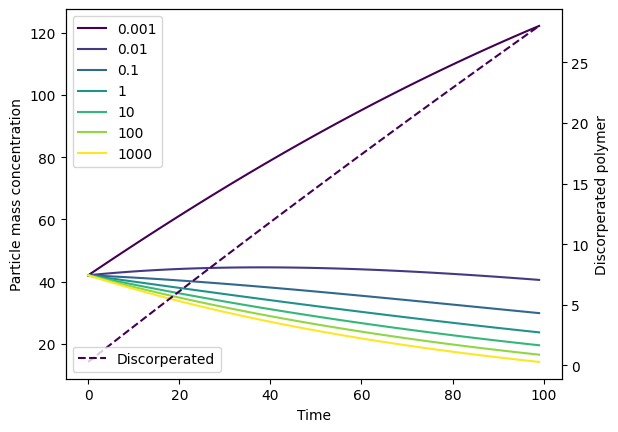

In [7]:
fig, axs = output.plot(plot_dissolution=True)
# The zeroth axis is the main particle concentration axis
axs[0].set_ylabel('Particle mass concentration')
# The first axis is the dissolution axis
axs[1].set_ylabel('Discorporated polymer')
axs[1].legend(['Discorporated'], loc='lower left')
# Save the figure to a file
fig.savefig('pretty-graph.png')